<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2019-2020/Examens/Examen_MN1_1erParcial_2019_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exàmen Mètodes Numèrics (20 juny 2019)

**Nom:**

**NIU:**

**mail (per fer arribar les correccions - gmail):**


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



### Ejercicio 1.



En este ejercicio veremos cómo el factor de correlación entre dos muestras totalmente correlacionadas se puede llegar a perder por culpa de un ruido.


1.   Genera $N=10000$ puntos equidistantes en las abscisas $(x,y) \in [-10,10]$  tales que $y_i = x_i$. Calcula el factor de correlación a partir de

$$
\rho = \frac{Cov(x,y)}{\sigma_x \sigma_y}
$$

2. Haz una gráfica de los puntos $(x,y)$ donde también se muestre de alguna forma el factor de correlación obtenido (en el título, en la leyenda, etc).

3. Considera un ruido sobre los puntos:

$$
x_i \to x_i + \epsilon_i \\
y_i \to y_i + \epsilon'_i
$$


> tal que $\epsilon_i \sim G(0,\sigma)$ i $\epsilon'_i \sim G(0,\sigma)$ (Nota: Son independientes y dependen de $\sigma$). Haz una gráfica similar a la del apartado 2, pero ahora usando los puntos $(x,y)$ que tienen un ruido determinado por $\sigma = 100$. Incluye también el factor de correlación.


4.  Vamos a ver cómo cambia $\rho$ en función de $\sigma$. Para eso genera un array de 1000 sigmas equidistantes entre 0 y 100 y para cada una genera el ruido y aplícalo en los puntos para obtener una nueva $\rho$.  Haz una gráfica de la evolución del factor de correlación en función de estas sigmas. 






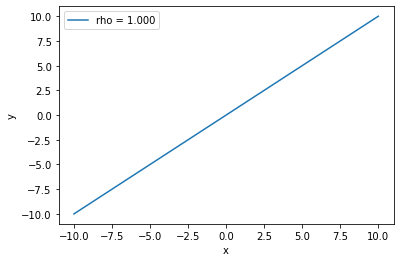

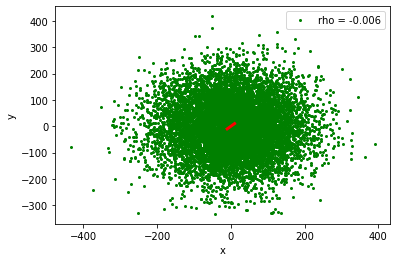

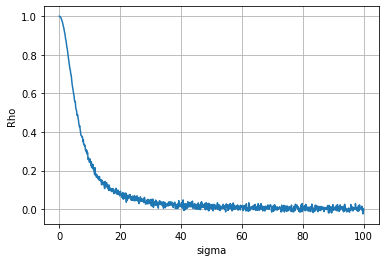

In [18]:
# Complert versió 1

def getRho(x,y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  cov = np.mean((x - x_mean)*(y - y_mean))
  x_sigma = np.std(x)
  y_sigma = np.std(y)
  
  return cov/(x_sigma*y_sigma)

N = 10000
SigmaL=100 
SigmaN=1000 

sigmas = np.linspace(0.,SigmaL,SigmaN) 

rhos = []

x0 = np.linspace(-10,10,N)
y0 = x0

for sigma in sigmas:

  x = x0 + np.random.normal(0,sigma,N) 
  y = y0 + np.random.normal(0,sigma,N) 
  
  rhos.append(getRho(x,y))

plt.plot(x0,y0, label="rho = {:.3f}".format(getRho(x0,y0)))
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

fig = plt.figure() 
axes = fig.add_subplot(1, 1, 1) 
axes.plot(x,y,'go',markersize=2., label="rho = {:.3f}".format(getRho(x,y)))
axes.plot(x0,y0,'r-',linewidth=3.)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show() 

fig = plt.figure()
plt.grid()
plt.plot(sigmas,rhos)
plt.ylabel("Rho")
plt.xlabel("sigma")
plt.show()

Text(0.5, 1.0, 'coeficient de correlació: 1.000')

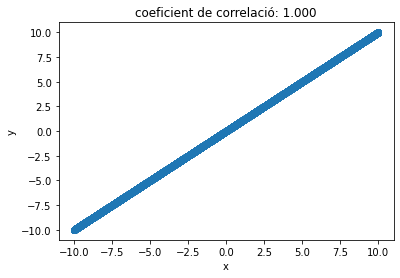

In [3]:
# Apartat 1 & 2 (versió 2)

import numpy as np
import matplotlib.pyplot as plt

N = 10000
x0 = np.linspace(-10,10,N) 
y0 = x0 

corr = np.mean((x0-np.mean(x0))*(y0-np.mean(y0)))/(np.std(x0)*np.std(y0))

plt.scatter(x0, y0)
plt.xlabel("x")
plt.ylabel("y")
plt.title("coeficient de correlació: %.3f" %corr)

Text(0.5, 1.0, 'coeficient de correlació: 0.002')

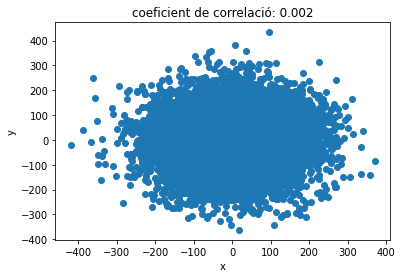

In [4]:
# Apartat 3 (versió 2)

import numpy as np
import matplotlib.pyplot as plt

N = 10000
x0 = np.linspace(-10,10,N) 
y0 = x0 

sigma = 100
x = x0 + np.random.normal(0,sigma,N) 
y = y0 + np.random.normal(0,sigma,N) 

corr = np.mean((x-np.mean(x))*(y-np.mean(y)))/(np.std(x)*np.std(y))

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("coeficient de correlació: %.3f" %corr)

Text(0.5, 0, 'sigma')

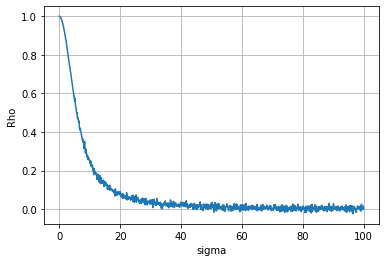

In [5]:
# Apartat 4 (versió 2)

import numpy as np
import matplotlib.pyplot as plt

N = 10000
x0 = np.linspace(-10,10,N) 
y0 = x0 

SigmaL=100 
SigmaN=1000 

sigmas = np.linspace(0.,SigmaL,SigmaN) 

rhos = []

for sigma in sigmas:

  x = x0 + np.random.normal(0,sigma,N)
  y = y0 + np.random.normal(0,sigma,N)
  
  corr = np.mean((x-np.mean(x))*(y-np.mean(y)))/(np.std(x)*np.std(y))
  
  rhos.append(corr)
  
plt.grid()
plt.plot(sigmas,rhos)
plt.ylabel("Rho")
plt.xlabel("sigma")


### Ejercicio 2.

Considera la función $y = x^2+10$ en el intervalo $[0,4]$. 

1.  Define las funciones de python para la función $y$ y su integral calculada analíticamente.

2.  Usa el método MC para calcular el área de una región limitada por la función $y$ en $[0,4]$ y las rectas $x=1$ e $y=0.1$. Implementa una función que evalúe el error cometido en tal cálculo para un número de puntos $N$ arbitrario en $[0,4]$ $\,\,\,\left(\text{Error} = |I_{MC} - I_\text{analítica}|\right)$.

3.  Para $N=10000$ haz una gráfica de los puntos aceptados en la región anterior, incluyendo también la gráfica de la función $y$ así como las rectas $x=1$ e $y=0.1$.

4.  Haz una gráfica del valor de la integral MC como función de $N$, tomando 10 valores de $N$ entre 1000 y 10000. Muestra también cómo el error definido anteriormente disminuye con el número de puntos.


MC area = 11.24 +/- -0.17439118155337852
True Integral = 11.414391181553379
Error = -0.17439118155337852 
[100.98560882  44.78560882  26.05227549  16.68560882  11.06560882
   7.31894215   4.64275168   2.63560882   1.07449771  -0.17439118]


Text(0.5, 0, 'N')

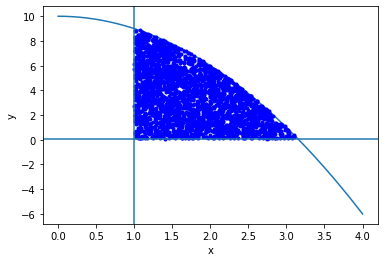

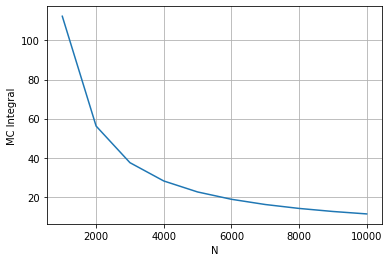

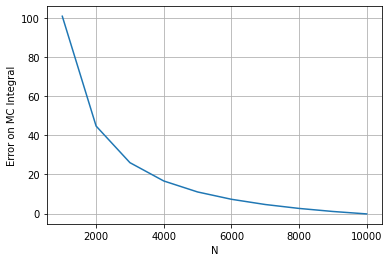

In [7]:
import numpy
import matplotlib.pyplot as plt

def function(x):
  return -x*x+10

def Ifunction(x):
  return -x**3/3. + 10.*x

a = 0
b = 4

def CalculateError(N,y_min,y_max,x_tries,y_tries):
  global x_valid
  global y_valid 
  
  x_valid0 = x_tries[y_tries <= function(x_tries)]
  y_valid0 = y_tries[y_tries <= function(x_tries)]

  x_valid1 = x_valid0[x_valid0>=1.]
  y_valid1 = y_valid0[x_valid0>=1.]

  x_valid = x_valid1[y_valid1>=0.1]
  y_valid = y_valid1[y_valid1>=0.1]

  MCIntegral = (b-a)*(y_max-y_min)*len(x_valid)/N
  EMCIntegral = (b-a)*(y_max-y_min)/numpy.sqrt(N)
  TrueIntegral = Ifunction(numpy.sqrt(9.9))-Ifunction(1.)
  
  return MCIntegral,(MCIntegral-TrueIntegral),TrueIntegral
  

x_plot = numpy.linspace(a,b,1000)
y_min = 0. 
y_max = numpy.amax(function(x_plot))

N = 10000

x_tries = numpy.random.uniform(a,b,N)
y_tries = numpy.random.uniform(y_min,y_max,N)

MCIntegral,EMCIntegral,TrueIntegral = CalculateError(N,y_min,y_max,x_tries,y_tries)  

fig = plt.figure()

plt.plot(x_plot,function(x_plot))
plt.plot(x_valid,y_valid,'b.')
plt.axhline(0.1)
plt.axvline(1.)
plt.ylabel("y")
plt.xlabel("x")

                                                 
print("MC area = {} +/- {}".format(MCIntegral,EMCIntegral))

print("True Integral = {}".format(TrueIntegral))

print("Error = {} ".format(EMCIntegral))

N_plot = numpy.linspace(1000,10000,10)
MCIntegral,EMCIntegral,TrueIntegral = CalculateError(N_plot,y_min,y_max,x_tries,y_tries)  

print(EMCIntegral)

fig = plt.figure()
plt.plot(N_plot,MCIntegral)
plt.grid()
plt.ylabel("MC Integral")
plt.xlabel("N")


fig = plt.figure()
plt.plot(N_plot,EMCIntegral)
plt.grid()
plt.ylabel("Error on MC Integral")
plt.xlabel("N")




### Ejercicio 3.

Consideremos un tirachinas que dispara una bola de hierro desde el suelo ($y_0=0$) con cierto ángulo $θ_0$ menor de 90º  con la horizontal. En el caso ideal la ecuación de la trayectoria $y(x)$ de la bola se puede escribir como:

$$
y(x) = tan(\theta_0)·x - \frac{g·x^2}{2·v_0^2·cos^2(\theta_0)}
$$

donde $\theta_0$ es  el ángulo de tiro, y $v_0$ es la velocidad inicial de la bola. El alcance máximo de la bola en este caso ideal es de:

$$
x_{max} = \frac{v_0^2·sin(2·\theta_0)}{g}
$$

Imagina que delante de ti, a una distancia de $150$ $m$ tienes una pared de $20$ $m$ de altura, y dispones de un tirachinas e infinitas bolas para tirar... 

1. Si tiras una bola con el tirachinas con un $\theta_0 = 25º$ y $v_0 = 50$ $m/s$, pasará por encima del muro? Haz una representación gráfica de la trayectória de la bola, y el muro, en un plano $(x,y)$. Asume $g = 9.81$ $m/s^2$ durante todo el ejercicio.

2. Después de unos intentos, te das cuenta que no eres muy preciso tirando bolas con el tirachinas. Tus tiros tienen una $v_0$ y un $\theta_0$ que siguen unas distribuciones normales, centradas en  $\theta_0 = 25º$ y $v_0 = 50$ $m/s$, y con unas desviaciones estandares de un $4\%$ y $2\%$ en el ángulo de tiro y la velocidad inicial, respectivamente ($\sigma_{\theta} = 0.04·\theta_0$,  $\sigma_{v_0} = 0.02·v_0$). Si tiras 10 bolas, eres capaz de traspasar el muro en alguno de los tiros? En cuantos? Este valor fluctúa mucho si haces varias realizaciones de tirar 10 bolas?

3. Repites esta experiencia muchas veces ($N_{tiros}$). Quieres estimar la probabilidad $\hat{p}$ de que pasen las bolas por encima del muro. Dibuja como evoluciona el error relativo (es decir, $\sigma[\hat{p}]/\hat{p}$, en porcentaje) con el número de bolas tiradas hasta que este error sea $<1\%$. Cuántas bolas gastarás para poder hacer esta estimación de $\hat{p}$ con un error menor del $1\%$? Cuál es la probabilidad $\hat{p}$ que obtienes al final, y su error $\sigma[\hat{p}]$? (recuerda que tienes infinitas cajas de bolas a tu disposición... te puede salir 'cara' la experiencia!). **NOTA:** Que una bola pase o no sigue una distribución binomial, donde los estimadores de $\hat{p}$ y varianza de $\hat{p}$ son:

$$
\hat{p} = \frac{N_{pasan}}{N_{tiros}}
\\
$$

$$
var[\hat{p}] = \frac{p(1-p)}{N_{tiros}} ; \,\,\,\ \sigma[\hat{p}] = \sqrt{var[\hat{p}]}
\\
$$


 EJERCICIO 1 



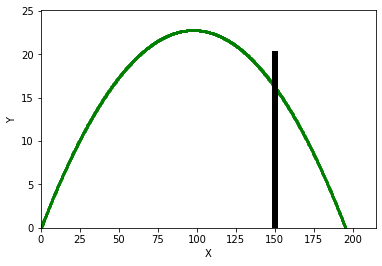


 EJERCICIO 2 

Realización 1  - Bolas que pasan el muro: 0
Realización 2  - Bolas que pasan el muro: 2
Realización 3  - Bolas que pasan el muro: 1
Realización 4  - Bolas que pasan el muro: 0
Realización 5  - Bolas que pasan el muro: 0
Realización 6  - Bolas que pasan el muro: 1
Realización 7  - Bolas que pasan el muro: 0
Realización 8  - Bolas que pasan el muro: 1
Realización 9  - Bolas que pasan el muro: 2
Realización 10  - Bolas que pasan el muro: 1
Realización 11  - Bolas que pasan el muro: 3
Realización 12  - Bolas que pasan el muro: 1
Realización 13  - Bolas que pasan el muro: 1
Realización 14  - Bolas que pasan el muro: 1
Realización 15  - Bolas que pasan el muro: 0

 EJERCICIO 3 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in double_scalars


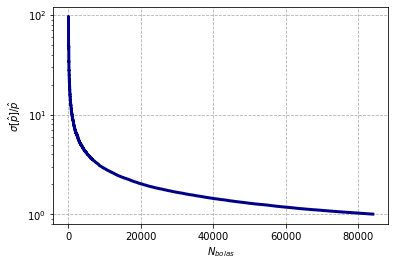

Numeros de bolas gastadas: 83993
P: 0.1064 ± 0.0011 %
sigma(p)/p: 1.00 %


In [19]:

import numpy
import matplotlib.pyplot as plt

def y(x, theta, v):
  return np.tan(theta)*x - (9.81*x**2)/(2.*(v**2)*(np.cos(theta))**2)

def xmax(theta, v):
  return v**2*np.sin(2*theta)/(9.81)

x_plot = numpy.linspace(0,200,1000)

th0=25.*np.pi/180.
v0=50.
Sigmath=0.04*th0
Sigmav=0.02*v0

x_pared=150.
h_pared=20.

# Ejercicio 1
  
print("\n EJERCICIO 1 \n")

y_plot = y(x_plot,th0,v0)

fig = plt.figure() 
axes = fig.add_subplot(1, 1, 1)
axes.set_ylim(0,1.1*max(y_plot))
axes.set_xlim(0,1.1*xmax(th0,v0))
axes.plot(x_plot,y_plot,'go',markersize=2.)
xm=[x_pared,x_pared]
ym=[0.,h_pared]
axes.plot(xm,ym,'k-', linewidth=6.)
axes.set_xlabel('X')
axes.set_ylabel('Y')
plt.show()

# Ejercicio 2

print("\n EJERCICIO 2 \n")

Bolas=10
NRealizaciones=15
Avgfr = []
Errfr = []
NT = []
for nt in range(1,NRealizaciones+1): 
  th=th0 + np.random.normal(0,Sigmath,Bolas)
  v=v0 + np.random.normal(0,Sigmav,Bolas)
  y_test=y(x_pared,th,v)
  print("Realización {}".format(nt), " - Bolas que pasan el muro: {}".format(len([i for i in y_test if i > h_pared])))


# Ejercicio 3
print("\n EJERCICIO 3 \n")

NBolas_Max=100000
npassed=0
#p , varp, stdp, nt, errp = ([], )*5
p = []
varp = []
stdp = []
nt = []
errp = []

for ntiros in range(1,NBolas_Max):
  th=th0 + np.random.normal(0,Sigmath,1)
  v=v0 + np.random.normal(0,Sigmav,1)
  y_test=y(x_pared,th,v)
  if (y_test > h_pared) : npassed+=1
  p_tmp = npassed/ntiros
  p.append(npassed/ntiros)
  varp.append(p_tmp*(1-p_tmp)/ntiros)
  stdp.append(np.sqrt(p_tmp*(1-p_tmp)/ntiros))
  errp.append(100.*np.sqrt(p_tmp*(1-p_tmp)/ntiros)/p_tmp)
  nt.append(ntiros)
  if ntiros > 100 and 100.*np.sqrt(p_tmp*(1-p_tmp)/ntiros)/p_tmp< 1.: 
    break
  

plt.plot(nt,errp,color='darkblue',lw=3)
plt.xlabel('$N_{bolas}$')
plt.ylabel('$\sigma[\hat{p}]/\hat{p}$')
plt.yscale('log', nonposy='clip')
plt.grid(True, linestyle="--")
plt.show()
#  print(ntiros,y_test,npassed, p)
  
print("Numeros de bolas gastadas: {}".format(nt[-1]))
print("P: {0:.4f} \u00B1 {1:.4f} %".format(p[-1],stdp[-1]))
print("sigma(p)/p: {0:.2f} %".format(errp[-1]))